In [1]:
from processing_answers import *
import pandas as pd
import matplotlib.pyplot as plt

INFO:root:Setting d_model to 1024
INFO:root:Initializing pre-trained transformer from google/flan-t5-large.
INFO:root:Enabling gradient checkpointing.


MOMENTPipeline(
  (normalizer): RevIN()
  (tokenizer): Patching()
  (patch_embedding): PatchEmbedding(
    (value_embedding): Linear(in_features=8, out_features=1024, bias=False)
    (position_embedding): PositionalEmbedding()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
  

/Users/beto/Documents/Projects/medLLM/venv/lib/python3.10/site-packages/nixtlats/nixtla_client.py:56: FutureWarning: `'token'` is deprecated; use `'api_key'` instead.
  warnings.warn(
/Users/beto/Documents/Projects/medLLM/venv/lib/python3.10/site-packages/nixtlats/nixtla_client.py:1531: FutureWarning: Class `TimeGPT` is deprecated; use `NixtlaClient` instead.
  warnings.warn(
/Users/beto/Documents/Projects/medLLM/venv/lib/python3.10/site-packages/nixtlats/nixtla_client.py:74: FutureWarning: Method `validate_token` is deprecated; use `validate_api_key` instead.
  warnings.warn(


SHAPE: 
(4130, 16)


COLUMNS: 
Index(['sequence', 'complexity', 'length_type', 'language', 'q_length',
       'GPT4_answer', 'a_length', 'temperature', 'real_code', 'print_code',
       'no_code', 'explanation', 'no_sense', 'exe_out', 'correct_execution',
       'Levenshtein'],
      dtype='object')


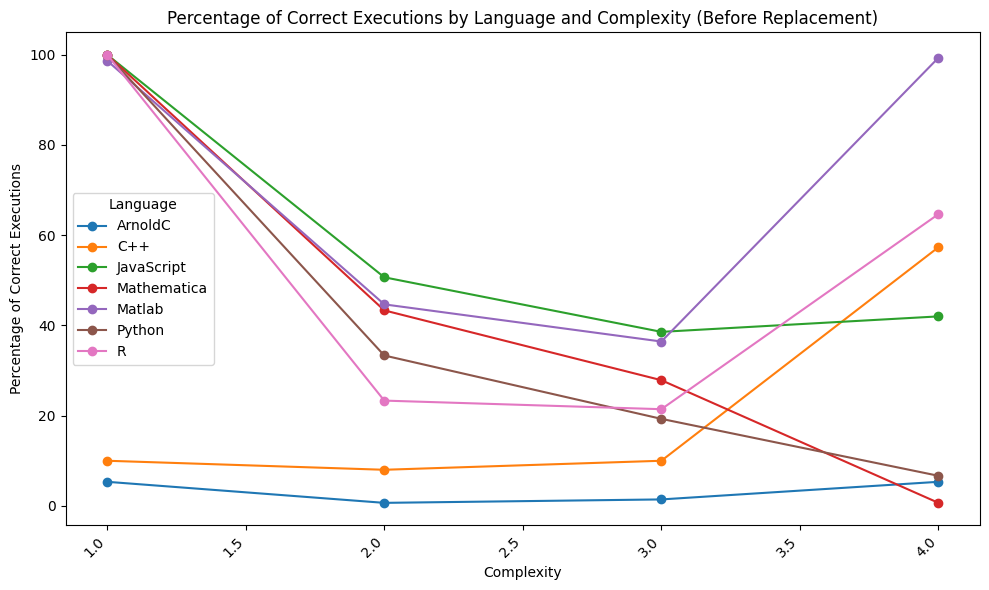

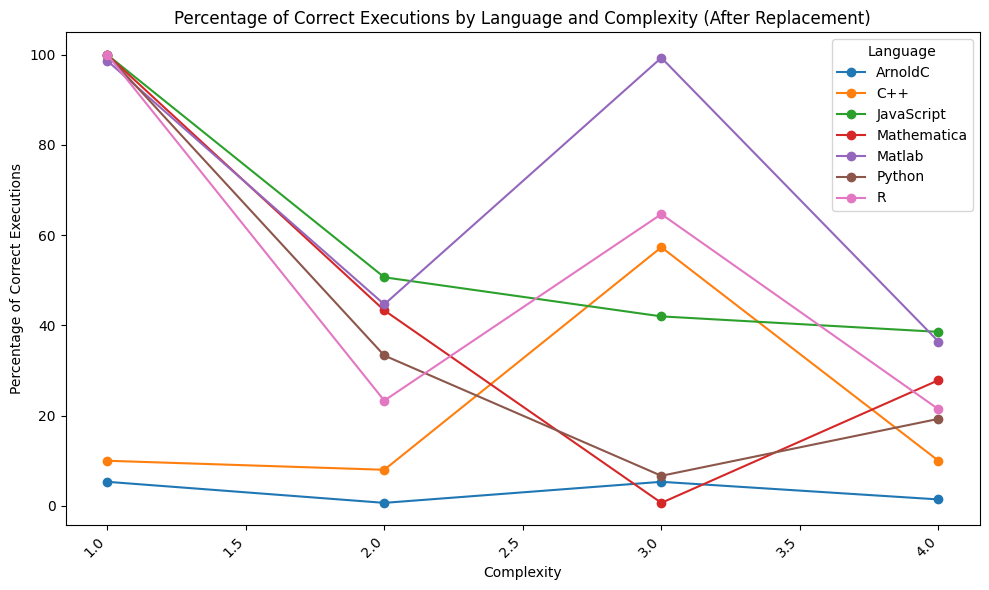

In [2]:
total_df = concat_all_results()
print("SHAPE: ")
print(total_df.shape)
print("\n")
print("COLUMNS: ")
print(total_df.columns)

# Plotting before replacement
fig, ax = plt.subplots(figsize=(10, 6))
grouped_before = total_df.groupby(["language", "complexity"])["correct_execution"].mean() * 100
grouped_before = grouped_before.sort_index(level='complexity')
for language in grouped_before.index.get_level_values('language').unique():
    ax.plot(grouped_before[language].index, grouped_before[language].values, marker='o', label=language)
ax.set_xlabel("Complexity")
ax.set_ylabel("Percentage of Correct Executions")
ax.set_title("Percentage of Correct Executions by Language and Complexity (Before Replacement)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Language")
plt.tight_layout()
plt.show()

# Replace complexity 4 by 3 and 3 by 4
total_df['complexity'] = total_df['complexity'].replace({4: 3, 3: 4})

# Plotting after replacement
fig, ax = plt.subplots(figsize=(10, 6))
grouped_after = total_df.groupby(["language", "complexity"])["correct_execution"].mean() * 100
grouped_after = grouped_after.sort_index(level='complexity')
for language in grouped_after.index.get_level_values('language').unique():
    ax.plot(grouped_after[language].index, grouped_after[language].values, marker='o', label=language)
ax.set_xlabel("Complexity")
ax.set_ylabel("Percentage of Correct Executions")
ax.set_title("Percentage of Correct Executions by Language and Complexity (After Replacement)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Language")
plt.tight_layout()
plt.show()

In [3]:
total_df

,sequence,complexity,length_type,language,q_length,GPT4_answer,a_length,temperature,real_code,print_code,no_code,explanation,no_sense,exe_out,correct_execution,Levenshtein
0,"2, 4, 6, 8, 10, 12, 14, 16, 18, 20",1,0,Mathematica,173,"```mathematica\nTable[2 i, {i, 1, 10}]\n```",41,1.000,0,0,0,0,0,"2, 4, 6, 8, 10, 12, 14, 16, 18, 20",True,0
1,"3, 6, 9, 12, 15, 18, 21, 24, 27, 30",1,0,Mathematica,174,"```mathematica\nTable[3*n, {n, 1, 10}]\n```",41,1.000,0,0,0,0,0,"3, 6, 9, 12, 15, 18, 21, 24, 27, 30",True,0
2,"4, 8, 12, 16, 20, 24, 28, 32, 36, 40",1,0,Mathematica,175,"```mathematica\nRange[4, 40, 4]\n```",34,1.000,0,0,0,0,0,"4, 8, 12, 16, 20, 24, 28, 32, 36, 40",True,0
3,"5, 10, 15, 20, 25, 30, 35, 40, 45, 50",1,0,Mathematica,176,"```mathematica\nTable[5*i, {i, 1, 10}]\n```",41,1.000,0,0,0,0,0,"5, 10, 15, 20, 25, 30, 35, 40, 45, 50",True,0
4,"6, 12, 18, 24, 30, 36, 42, 48, 54, 60",1,0,Mathematica,176,"```mathematica\nTable[6*i, {i, 1, 10}]\n```",41,1.000,0,0,0,0,0,"6, 12, 18, 24, 30, 36, 42, 48, 54, 60",True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,"187, 218, 260, 295, 301, 314, 379, 410, 452, 469",3,0,R,176,"```r\nseq <- c(187, 218, 260, 295, 301, 314, 3...",78,0.001,0,1,0,0,0,"187, 218, 260, 295, 301, 314, 379, 410, 452, 469",True,0
586,"29, 63, 95, 140, 150, 190, 221, 437, 482, 491",3,0,R,173,"```r\nsequence <- c(29, 63, 95, 140, 150, 190,...",85,0.001,0,1,0,0,0,"29, 63, 95, 140, 150, 190, 221, 437, 482, 491",True,0
587,"3, 11, 84, 144, 156, 177, 188, 199, 229, 284",3,0,R,172,"```r\nsequence <- c(3, 11, 84, 144, 156, 177, ...",84,0.001,0,1,0,0,0,", 3, 11, 84, 144, 156, 177, 188, 199, 229, 284",False,2
588,"26, 94, 98, 137, 176, 301, 323, 330, 372, 444",3,0,R,173,"```r\nsequence <- c(26, 94, 98, 137, 176, 301,...",85,0.001,0,1,0,0,0,"26, 94, 98, 137, 176, 301, 323, 330, 372, 444",True,0


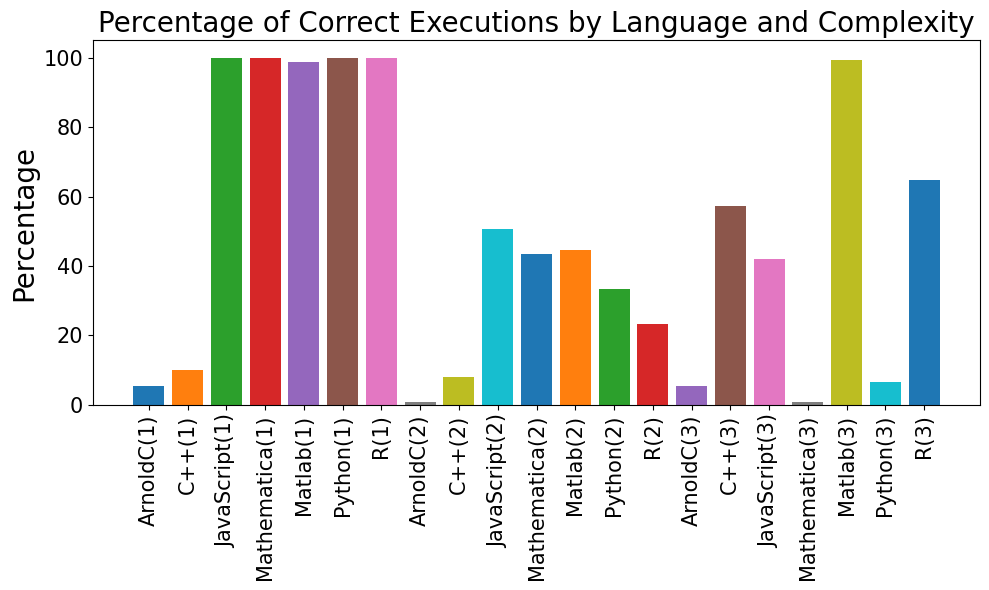

In [4]:
# Group by 'language' and 'complexity' and calculate the percentage of true values in 'correct_execution'
grouped = total_df.groupby(["language", "complexity"])["correct_execution"].mean() * 100

# Filter out complexity 4
grouped = grouped[grouped.index.get_level_values('complexity') != 4]

# Sort by complexity
grouped = grouped.sort_index(level='complexity')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over groups and plot
for (language, complexity), percentage in grouped.items():
    ax.bar(f"{language}({complexity})", percentage)

# Adding labels and title
ax.set_xlabel("", fontsize=15)
ax.set_ylabel("Percentage", fontsize=20)
ax.set_title("Percentage of Correct Executions by Language and Complexity", fontsize=20)
plt.xticks(rotation=90, ha="center", fontsize=15)
plt.yticks(fontsize=15)

# Show plot
plt.tight_layout()
plt.show()

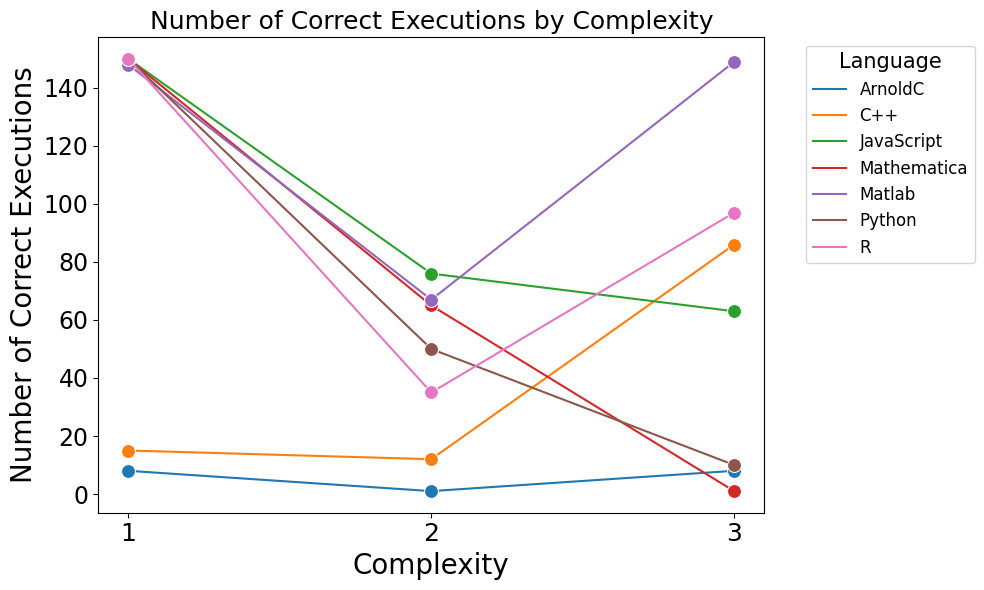

In [5]:
# Ensure that the only values in complexity are 1, 2, and 3
filtered_df = total_df[total_df['complexity'].isin([1, 2, 3])]

# Group by 'language' and 'complexity' and count the number of correct executions
grouped_data = (
    filtered_df.groupby(["language", "complexity"])["correct_execution"]
    .sum()
    .reset_index()
)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=grouped_data,
    x="complexity",
    y="correct_execution",
    hue="language",
    marker="o",
    markersize=10,
)
plt.title("Number of Correct Executions by Complexity", fontsize=18)
plt.xlabel("Complexity", fontsize=20)
plt.ylabel("Number of Correct Executions", fontsize=20)
plt.xticks(ticks=[1, 2, 3], fontsize=18)
plt.yticks(fontsize=17)
plt.legend(title="Language", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, title_fontsize=15)
plt.tight_layout()
plt.show()

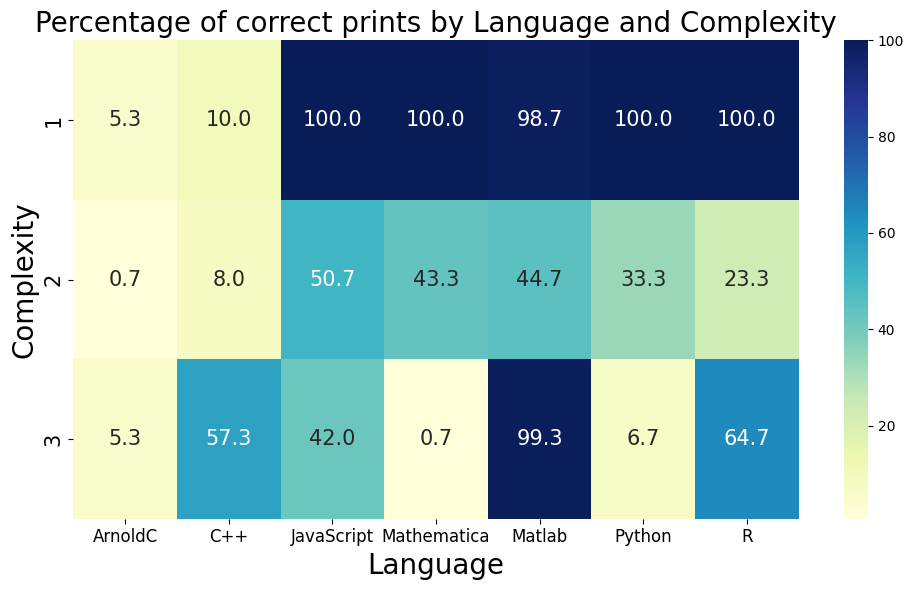

In [16]:
# Filter out complexity 3
filtered_df = total_df[total_df['complexity'].isin([1, 2, 3])]

# Pivot the DataFrame to calculate the count of correct executions and the percentage of correct executions with print_code equal to 1
pivot_table = filtered_df.pivot_table(
    index="complexity",
    columns="language", 
    values="correct_execution",
    aggfunc=["count", lambda x: (x == True).sum() / x.count() * 100],
)

# Plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table["<lambda>"],
    cmap="YlGnBu",
    annot=True,
    fmt=".1f",
    cbar_kws={"label": ""},
    annot_kws={"size": 15}
)
plt.title("Percentage of correct prints by Language and Complexity", fontsize=20)
plt.xlabel("Language",fontsize=20)
plt.ylabel("Complexity",fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

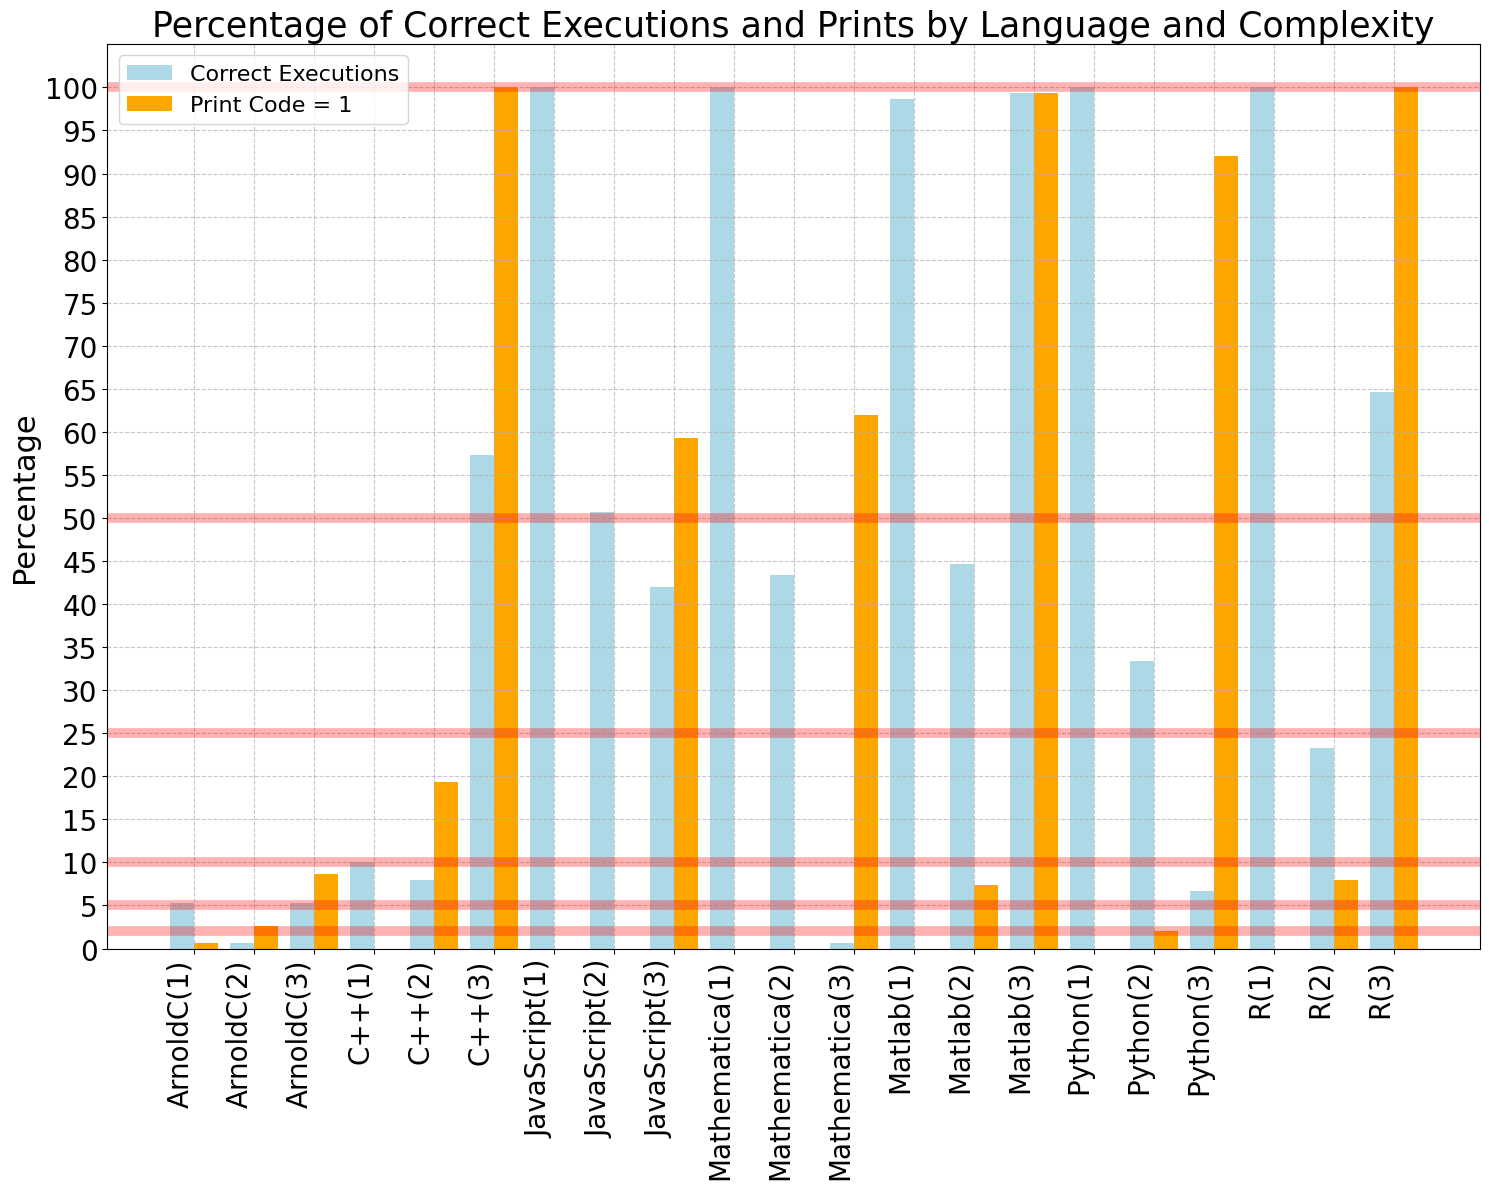

In [35]:
import numpy as np
# Filter out complexity 3
filtered_df = total_df[total_df['complexity'].isin([1, 2, 3])]

# Group by 'language' and 'complexity' and calculate the percentage of correct executions
grouped_correct = (
    filtered_df.groupby(["language", "complexity"])["correct_execution"].mean() * 100
)

# Count the number of correct executions where print_code is equal to 1
grouped_print_count = (
    filtered_df[filtered_df["print_code"] == 1]
    .groupby(["language", "complexity"])["correct_execution"]
    .count()
)

# Calculate the total number of correct executions per group
grouped_correct_count = filtered_df.groupby(["language", "complexity"])[
    "correct_execution"
].count()

# Calculate the percentage of print_code for each group
grouped_print_percentage = (grouped_print_count / grouped_correct_count) * 100

# Plotting
fig, ax = plt.subplots(figsize=(15, 12))

# Width of each bar
bar_width = 0.40

# Get the positions for the bars
x = range(len(grouped_correct))

# Plotting bars for correct executions
rects1 = ax.bar(
    x, grouped_correct, width=bar_width, label="Correct Executions", color="lightblue"
)

# Plotting bars for percentage of print_code
rects2 = ax.bar(
    [i + bar_width for i in x],
    grouped_print_percentage,
    width=bar_width,
    label="Print Code = 1",
    color="orange",
)

# Adding labels and title
#ax.set_xlabel("Language and Complexity", fontsize=20)
ax.set_ylabel("Percentage", fontsize=22)
ax.set_title(
    "Percentage of Correct Executions and Prints by Language and Complexity",
    fontsize=25  # Increased by 1.5x from the default size (usually 10)
)
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(
    [
        f"{language}({complexity})"
        for language, complexity in grouped_correct.index
    ],
    rotation=90,
    ha="right",
    fontsize=20  # Increased by 1.5x from the default size (usually 10)
)
ax.legend(fontsize=16)

# Set y-ticks every 5 units from 0 to 100
plt.yticks(np.arange(0, 105, 5), fontsize=20)

# Add horizontal grid lines at specific percentages
for y_value in [2, 5, 10, 25, 50, 100]:
    ax.axhline(y=y_value, color='red', linestyle='-', alpha=0.3, linewidth=7)

# Add grid
ax.grid(True, axis='both', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

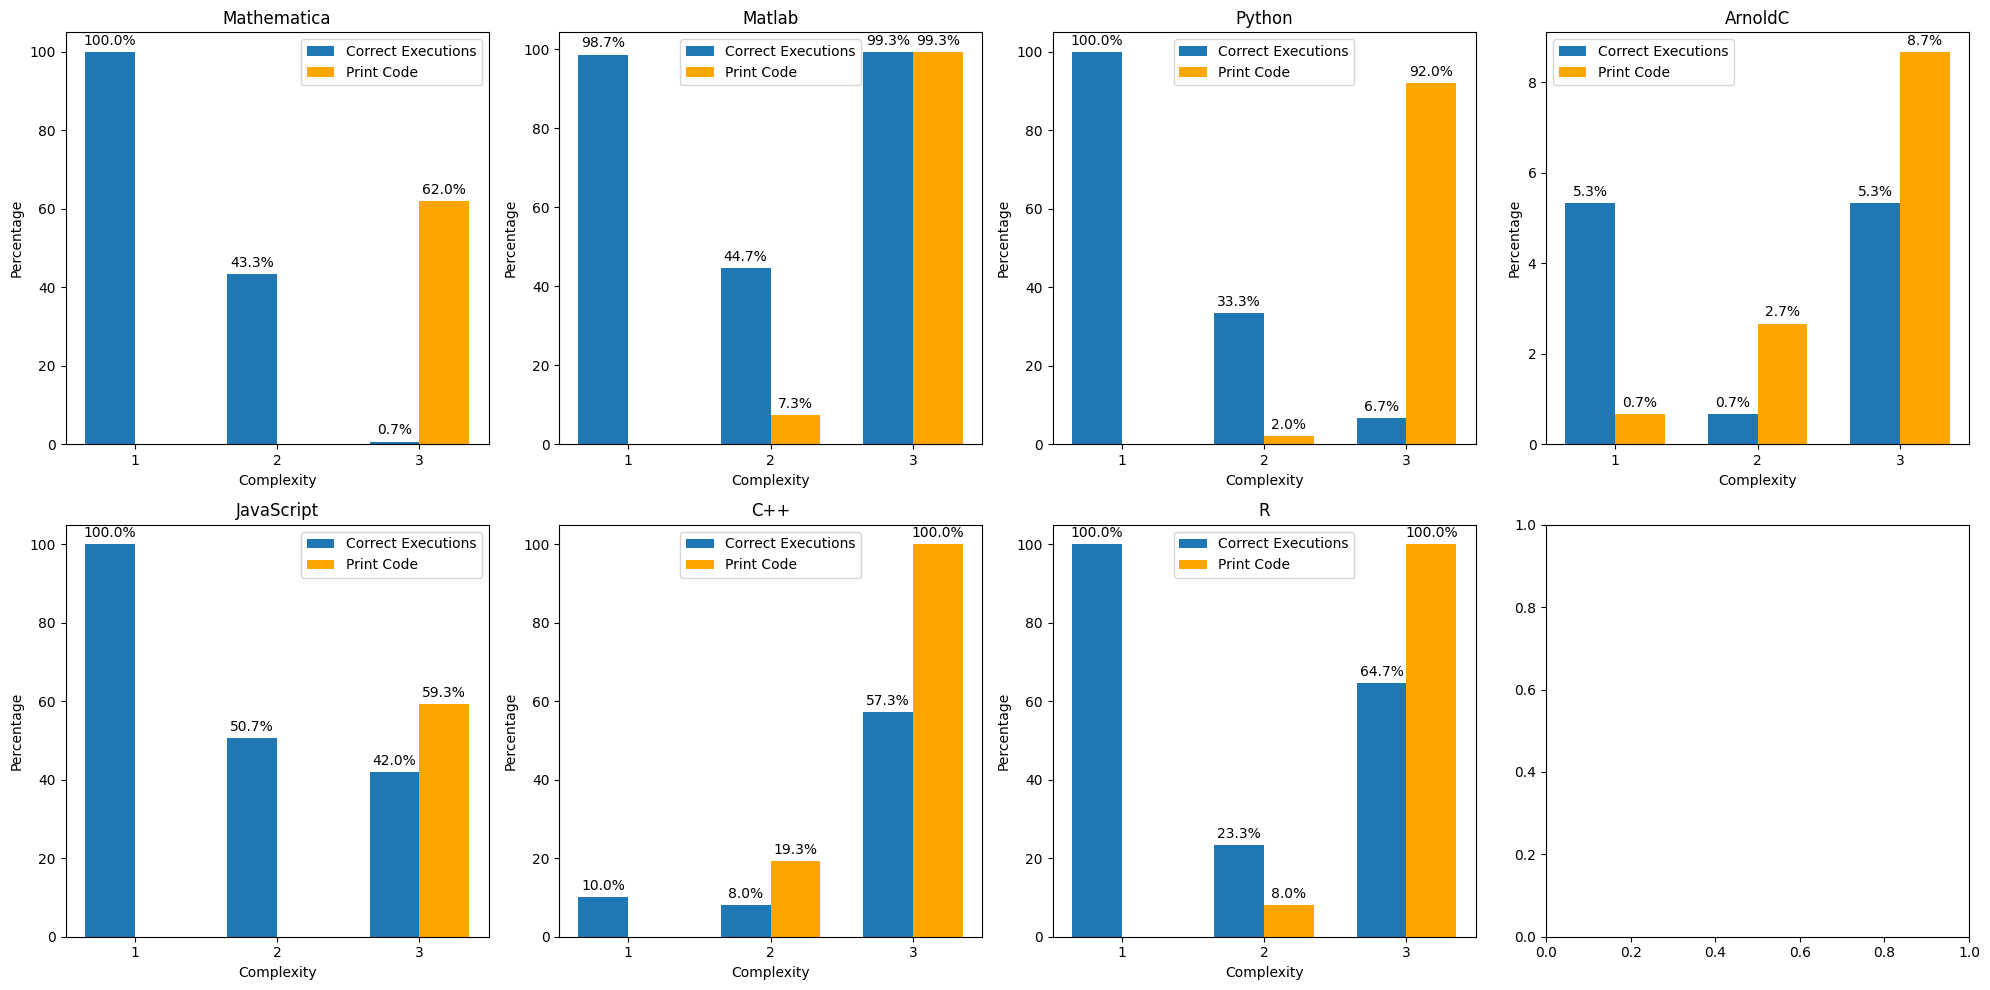

In [36]:
# Filter out complexity 4
total_df_filtered = total_df[total_df["complexity"] != 4]

# Get unique languages
languages = total_df_filtered["language"].unique()

# Plotting
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows and 4 columns

# Flatten axes for easy iteration
axes = axes.flatten()

for idx, language in enumerate(languages):
    # Filter DataFrame for the current language
    language_df = total_df_filtered[total_df_filtered["language"] == language]

    # Group by 'complexity' and calculate the percentage of correct executions
    grouped_correct_lang = (
        language_df.groupby("complexity")["correct_execution"].mean() * 100
    )

    # Group by 'complexity' and calculate the percentage of correct executions involving 'print_code'
    grouped_print_count_lang = (
        language_df[language_df["print_code"] == 1]
        .groupby("complexity")["correct_execution"]
        .count()
    )

    # Calculate the total number of correct executions per group
    grouped_correct_count_lang = language_df.groupby("complexity")[
        "correct_execution"
    ].count()

    # Calculate the percentage of print_code for each group
    grouped_print_percentage_lang = (
        grouped_print_count_lang / grouped_correct_count_lang
    ) * 100

    # Plotting
    ax = axes[idx]
    x = grouped_correct_lang.index
    bar_width = 0.35

    rects1 = ax.bar(
        x, grouped_correct_lang, width=bar_width, label="Correct Executions"
    )
    rects2 = ax.bar(
        [i + bar_width for i in x],
        grouped_print_percentage_lang,
        width=bar_width,
        label="Print Code",
        color="orange",
    )

    # Adding labels and title
    ax.set_xlabel("Complexity")
    ax.set_ylabel("Percentage")
    ax.set_title(f"{language}")
    ax.set_xticks([i + bar_width / 2 for i in x])
    ax.set_xticklabels(x)
    ax.legend()

    # Function to add percentages on top of the bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(
                f"{height:.1f}%",
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha="center",
                va="bottom",
            )

    # Adding percentages on top of the bars
    autolabel(rects1)
    autolabel(rects2)

# Adjust layout
plt.tight_layout()
plt.show()



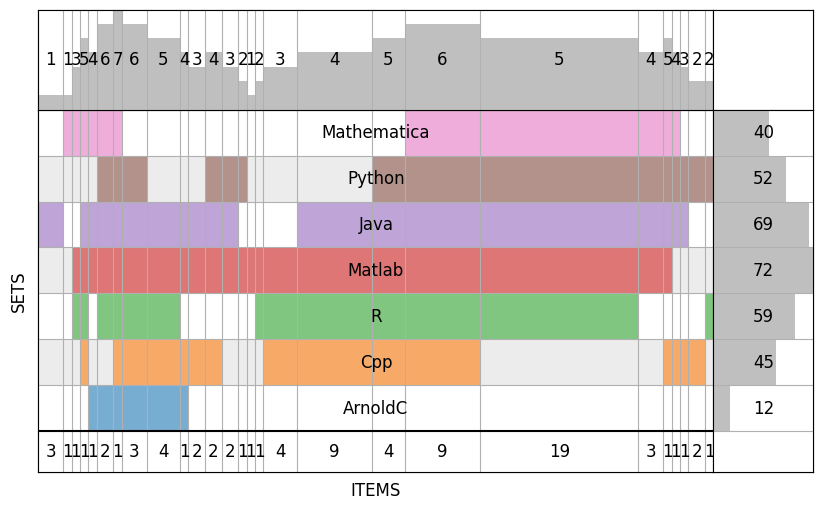

In [37]:
def list_of_correct_sequences(language, dataframe):
    df = copy.deepcopy(dataframe[dataframe["language"] == language])
    filtered = df[(df["correct_execution"] == True) & (df["complexity"] != 4)]
    return set(list(filtered["sequence"].unique()))

mathe_list = list_of_correct_sequences("Mathematica", total_df)
R_list = list_of_correct_sequences("R", total_df)
mat_list = list_of_correct_sequences("Matlab", total_df)
python_list = list_of_correct_sequences("Python", total_df)
cpp_list = list_of_correct_sequences("C++", total_df)
arnold_list = list_of_correct_sequences("ArnoldC", total_df)
java_list = list_of_correct_sequences("JavaScript", total_df)

from supervenn import supervenn
sets = [mathe_list, R_list, mat_list, python_list, cpp_list, java_list, arnold_list]

sets = [mathe_list, R_list, mat_list, python_list, cpp_list, java_list, arnold_list]
labels = ['Mathematica', 'R', 'Matlab', 'Python', 'Cpp', 'Java', 'ArnoldC']
plt.figure(figsize=(10, 6))
supervenn(sets, labels , sets_ordering='minimize gaps')

In [38]:
total_df = concat_all_results()
analysis_df, filtered_list_dic = analyze_all_languages(total_df)
analysis_df

,complexity,language,percentages,avg_answer_len,norm_avg_answer_len,compressed_avg_len,compressed_norm_avg_len,compressed_seq_avg_len,no_compression_percentage,p_percentages,...,ip_compressed_norm_avg_len,ip_compressed_seq_avg_len,ip_no_compression_percentage,p_c_percentages,p_c_avg_answer_len,p_c_norm_avg_answer_len,p_c_compressed_avg_len,p_c_compressed_norm_avg_len,p_c_compressed_seq_avg_len,p_c_no_compression_percentage
0,1,Mathematica,100.000000,34.880000,34.880000,80.240000,80.240000,73.733333,18.666667,16.610169,...,NaN,NaN,NaN,0.169492,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Mathematica,100.000000,60.586667,60.586667,122.773333,122.773333,76.933333,13.833333,16.610169,...,NaN,NaN,NaN,0.169492,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Mathematica,100.000000,64.321429,63.321429,131.314286,129.614286,63.071429,28.476190,16.610169,...,73.200000,62.000000,100.000000,0.169492,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Mathematica,100.000000,73.940000,45.673333,146.373333,100.680000,87.666667,65.266667,16.610169,...,76.021505,88.000000,100.000000,0.169492,NaN,NaN,NaN,NaN,NaN,NaN
0,1,Matlab,100.000000,40.946667,40.946667,93.880000,93.880000,73.733333,18.533333,31.016949,...,NaN,NaN,NaN,28.135593,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Matlab,100.000000,139.740000,136.700000,182.920000,178.186667,77.066667,25.533333,31.016949,...,76.000000,80.750000,100.000000,28.135593,64.000000,29.000000,128.000000,74.000000,68.000000,100.0
2,3,Matlab,100.000000,139.292857,133.892857,184.985714,176.871429,63.071429,42.875000,31.016949,...,86.222222,71.777778,100.000000,28.135593,69.214286,41.571429,133.714286,88.857143,61.285714,100.0
3,4,Matlab,100.000000,87.346667,41.873333,160.320000,88.453333,87.666667,99.400000,31.016949,...,NaN,NaN,NaN,28.135593,86.778523,41.000000,160.281879,87.932886,87.651007,100.0
0,1,Python,100.000000,51.593333,51.593333,114.546667,114.546667,73.733333,10.000000,27.288136,...,NaN,NaN,NaN,2.542373,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Python,100.000000,160.333333,159.626667,214.586667,213.493333,76.933333,22.800000,27.288136,...,154.000000,66.000000,20.000000,2.542373,103.000000,50.000000,194.000000,112.000000,100.000000,100.0


In [39]:
nf_total = pd.DataFrame()
languages = filtered_list_dic.keys()
for l in languages:
    nf_total = pd.concat([nf_total, filtered_list_dic[l]["nf"]])

ls = nf_total["language"].unique()
print(ls)
mathematica_sf = copy.deepcopy(nf_total[nf_total["language"] == "Mathematica"])
mathematica_sf_c = copy.deepcopy(
    mathematica_sf[mathematica_sf["correct_execution"] == True]
)
mathematica_sf_p = copy.deepcopy(mathematica_sf[mathematica_sf["print_code"] == 1])
mathematica_sf_cnp = copy.deepcopy(
    mathematica_sf[
        (mathematica_sf["correct_execution"] == True)
        & (mathematica_sf["print_code"] == 0)
    ]
)
matlab_sf = copy.deepcopy(nf_total[nf_total["language"] == "Matlab"])
python_sf = copy.deepcopy(nf_total[nf_total["language"] == "Python"])
arnold_sf = copy.deepcopy(nf_total[nf_total["language"] == "ArnoldC"])
java_sf = copy.deepcopy(nf_total[nf_total["language"] == "JavaScript"])
cpp_sf = copy.deepcopy(nf_total[nf_total["language"] == "C++"])
R_sf = copy.deepcopy(nf_total[nf_total["language"] == "R"])

['Mathematica' 'Matlab' 'Python' 'ArnoldC' 'JavaScript' 'C++' 'R']


/Users/beto/Documents/Projects/medLLM/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/zt/2fc2dgl527j0fpwfk176q2k40000gn/T/ipykernel_47483/4210738135.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


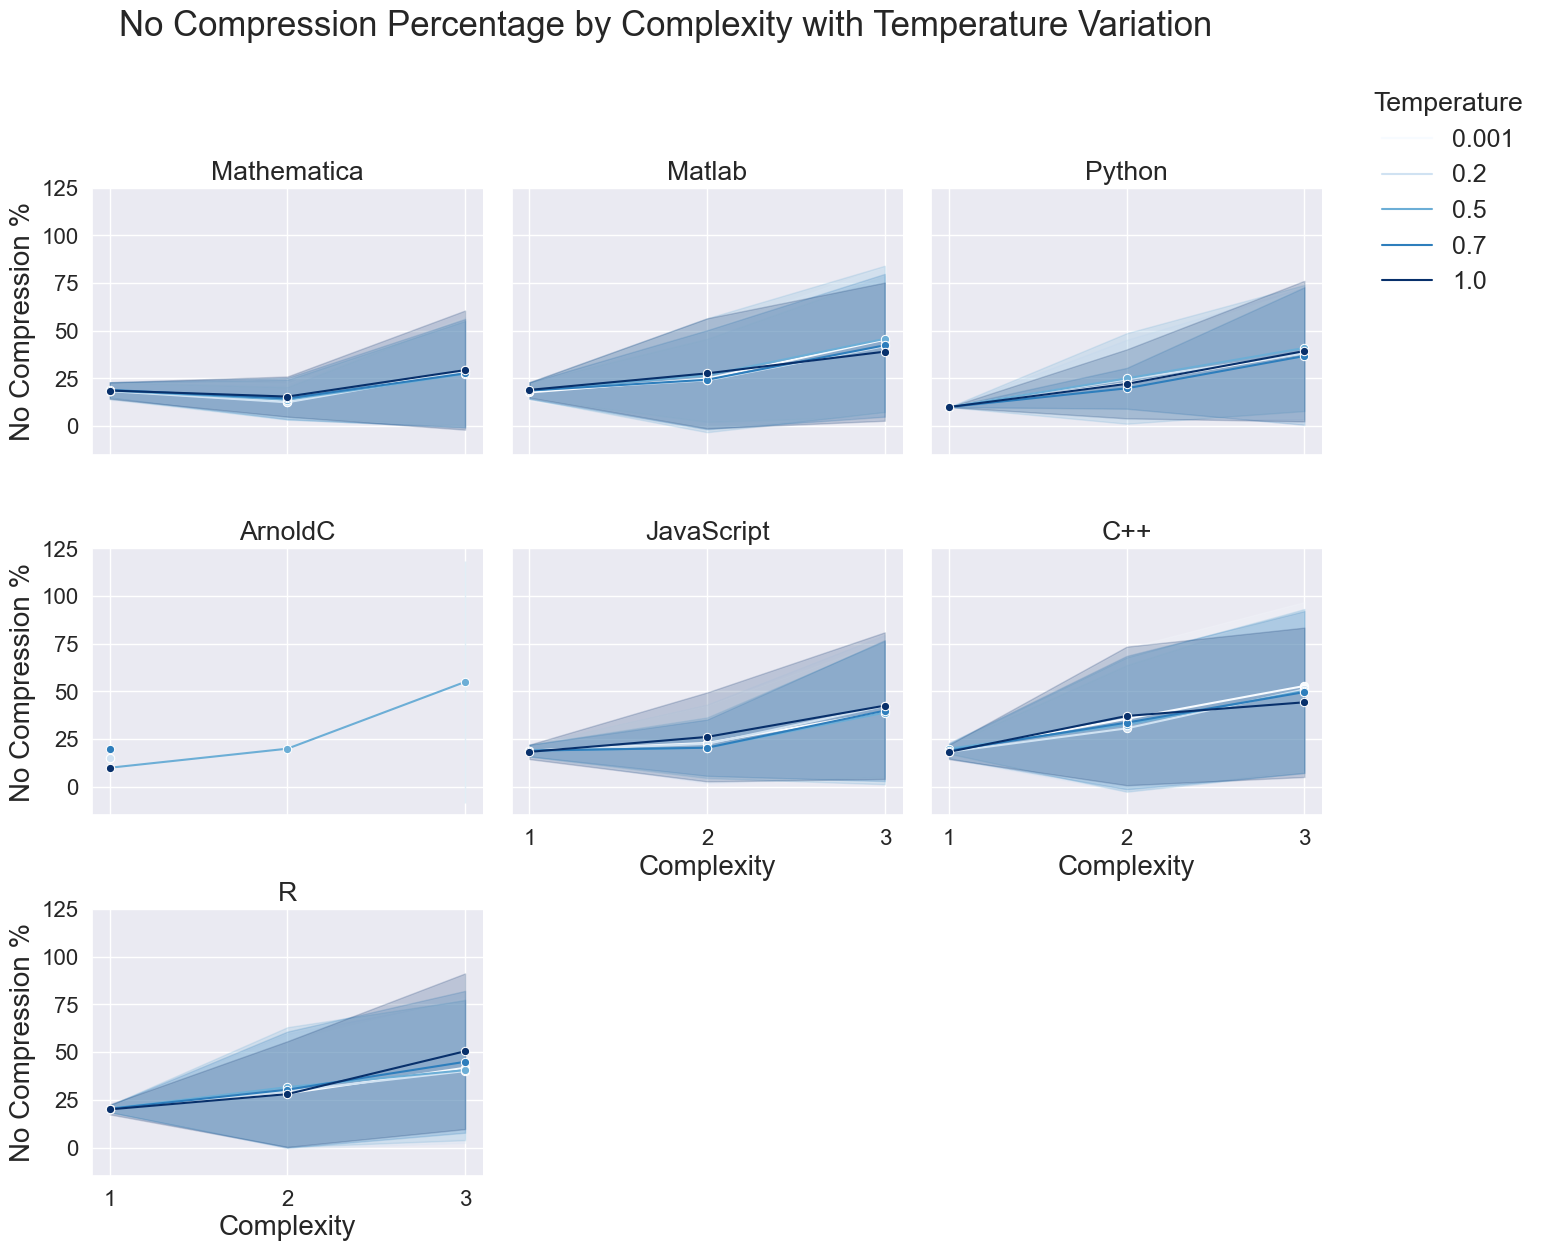

In [64]:
# Set seaborn style
sns.set_style("whitegrid")

# Filter out complexity 3 and rename complexity 4 to 3
nf_total_filtered = nf_total[nf_total["complexity"] != 4]

# Create a FacetGrid for multiplot with increased font size
sns.set(font_scale=1.6) 
g = sns.FacetGrid(nf_total_filtered, col="language", col_wrap=3, height=4)
g.set_titles(col_template="{col_name}", fontsize=20)  # Doubled font size from 2 to 4
g.set_axis_labels("Complexity", "No Compression Percentage")
for ax in g.axes.flat:
    ax.title.set_fontsize(20)  # Increased font size for title
    ax.xaxis.label.set_size(40)  # X-axis label size
    ax.yaxis.label.set_size(40)  # Y-axis label size
    ax.tick_params(axis='y', labelsize=20)  # Y-axis tick label size

# Plot the relationship between 'complexity' and 'no_compression_percentage' with shadow indicating 'temperature'
g.map_dataframe(
    sns.lineplot,
    x="complexity",
    y="no_compression_percentage",
    hue="temperature",
    errorbar="sd",
    marker="o",
    palette="Blues"
)

# Set labels and title with increased font size
g.set_axis_labels("Complexity", "No Compression %", fontsize=20)
g.set_titles(col_template="{col_name}", fontsize=80)  # Increased font size even more
g.fig.suptitle(
    "No Compression Percentage by Complexity with Temperature Variation", y=1.05, fontsize=25
)

# Adjust legend with increased font size
g.add_legend(title="Temperature", bbox_to_anchor=(1, 1), loc="upper left", title_fontsize=18, fontsize=18)

# Set x-axis ticks to only show values 1, 2, and 3
for ax in g.axes.flat:
    ax.set_xticks([1, 2, 3])
    ax.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.show()

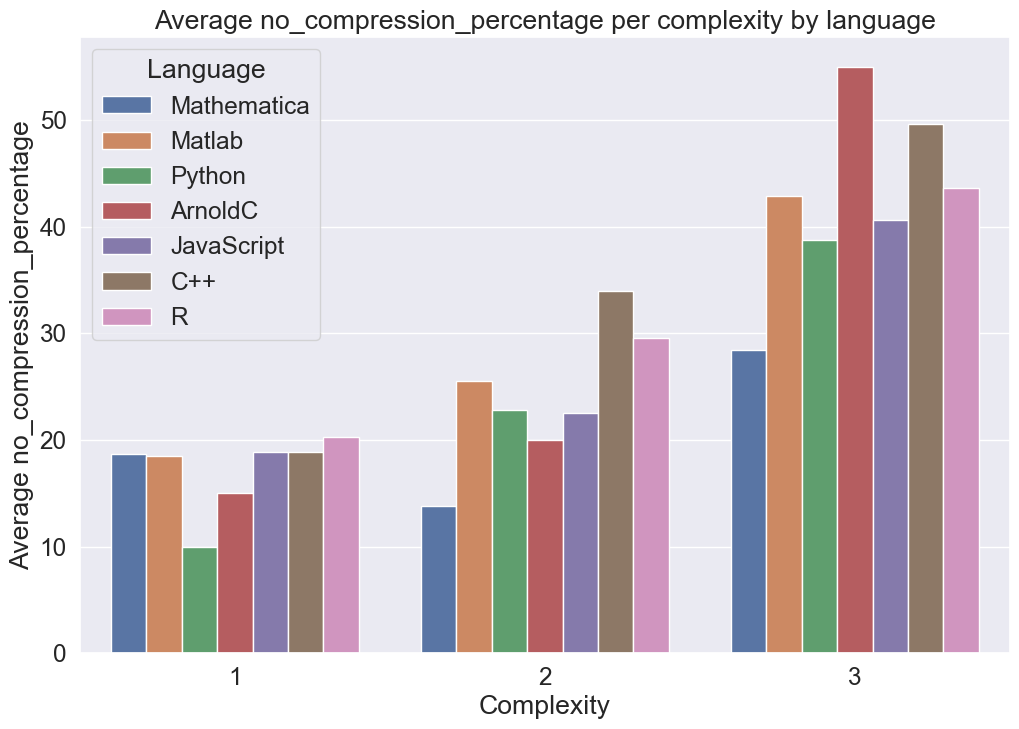

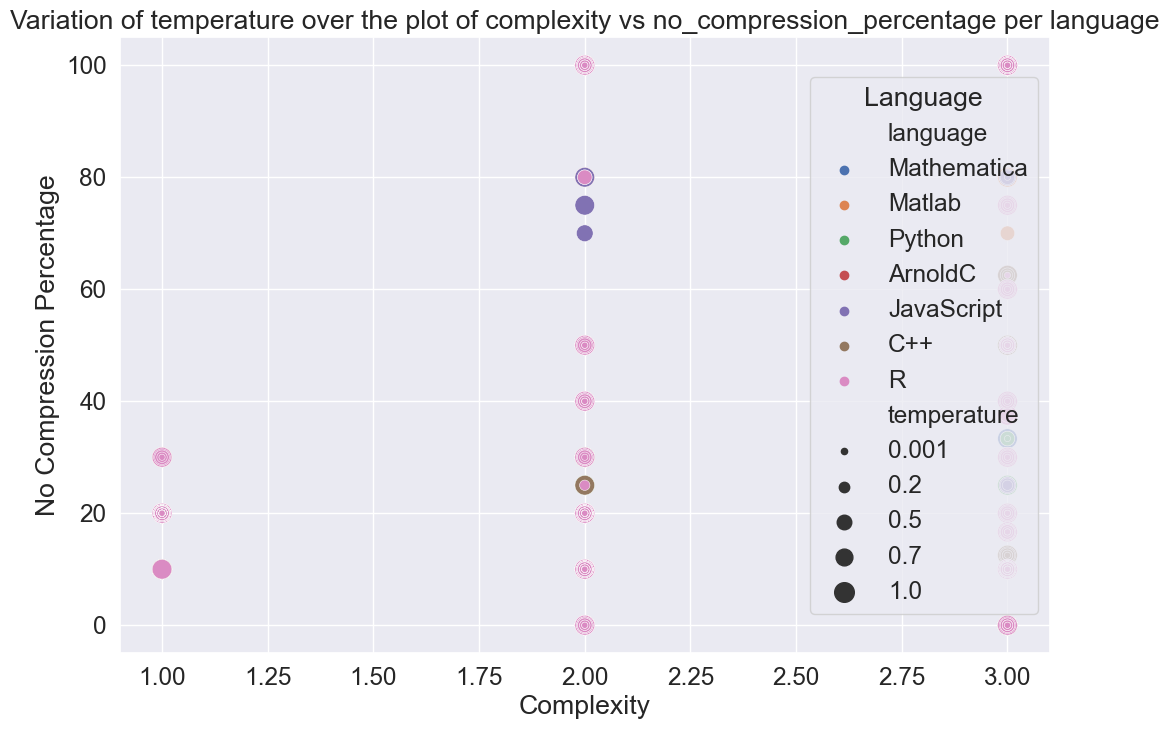

In [65]:
# Filter out complexity 3 and rename complexity 4 to 3
nf_total_filtered = nf_total[nf_total["complexity"] != 4]

# Plotting the average no_compression_percentage per complexity, by language
plt.figure(figsize=(12, 8))
sns.barplot(
    x="complexity",
    y="no_compression_percentage",
    hue="language",
    data=nf_total_filtered,
    errorbar=None,
)
plt.title("Average no_compression_percentage per complexity by language")
plt.xlabel("Complexity")
plt.ylabel("Average no_compression_percentage")
plt.legend(title="Language")
plt.show()

# Plotting the variation of temperature over the plot of complexity vs no_compression_percentage per language
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="complexity",
    y="no_compression_percentage",
    hue="language",
    size="temperature",
    sizes=(20, 200),
    data=nf_total_filtered,
)
plt.title(
    "Variation of temperature over the plot of complexity vs no_compression_percentage per language"
)
plt.xlabel("Complexity")
plt.ylabel("No Compression Percentage")
plt.legend(title="Language")
plt.show()

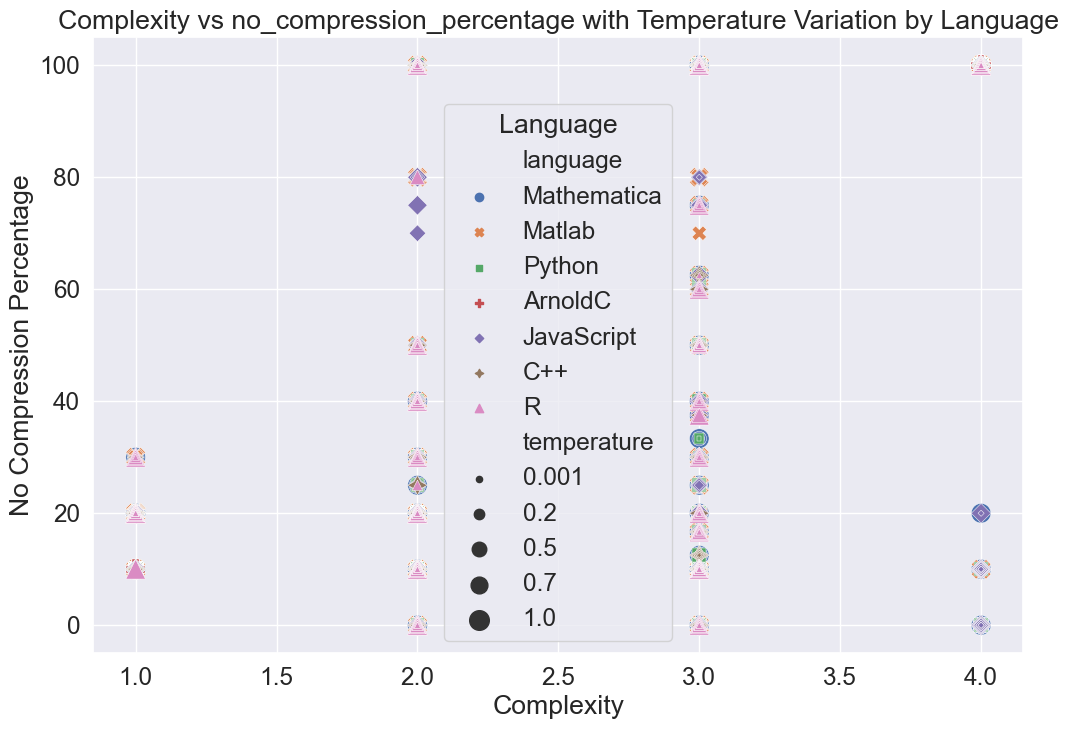

In [66]:
plt.figure(figsize=(12, 8))

# Plotting the variation of temperature over the plot of complexity vs no_compression_percentage per language
sns.scatterplot(
    x="complexity",
    y="no_compression_percentage",
    hue="language",
    size="temperature",
    style="language",
    sizes=(20, 200),
    data=nf_total,
)

plt.title(
    "Complexity vs no_compression_percentage with Temperature Variation by Language"
)
plt.xlabel("Complexity")
plt.ylabel("No Compression Percentage")
plt.legend(title="Language")
plt.show()

In [67]:
filtered_list_dic

{'Mathematica': {'nf':                                              sequence  complexity  \
  0                  2, 4, 6, 8, 10, 12, 14, 16, 18, 20           1   
  1                 3, 6, 9, 12, 15, 18, 21, 24, 27, 30           1   
  2                4, 8, 12, 16, 20, 24, 28, 32, 36, 40           1   
  3               5, 10, 15, 20, 25, 30, 35, 40, 45, 50           1   
  4               6, 12, 18, 24, 30, 36, 42, 48, 54, 60           1   
  ..                                                ...         ...   
  585  187, 218, 260, 295, 301, 314, 379, 410, 452, 469           4   
  586     29, 63, 95, 140, 150, 190, 221, 437, 482, 491           4   
  587      3, 11, 84, 144, 156, 177, 188, 199, 229, 284           4   
  588     26, 94, 98, 137, 176, 301, 323, 330, 372, 444           4   
  589     39, 81, 88, 210, 215, 378, 416, 430, 439, 490           4   
  
       length_type     language  q_length  \
  0              0  Mathematica       173   
  1              0  Mathematica   

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

IndexError: index 6 is out of bounds for axis 0 with size 6

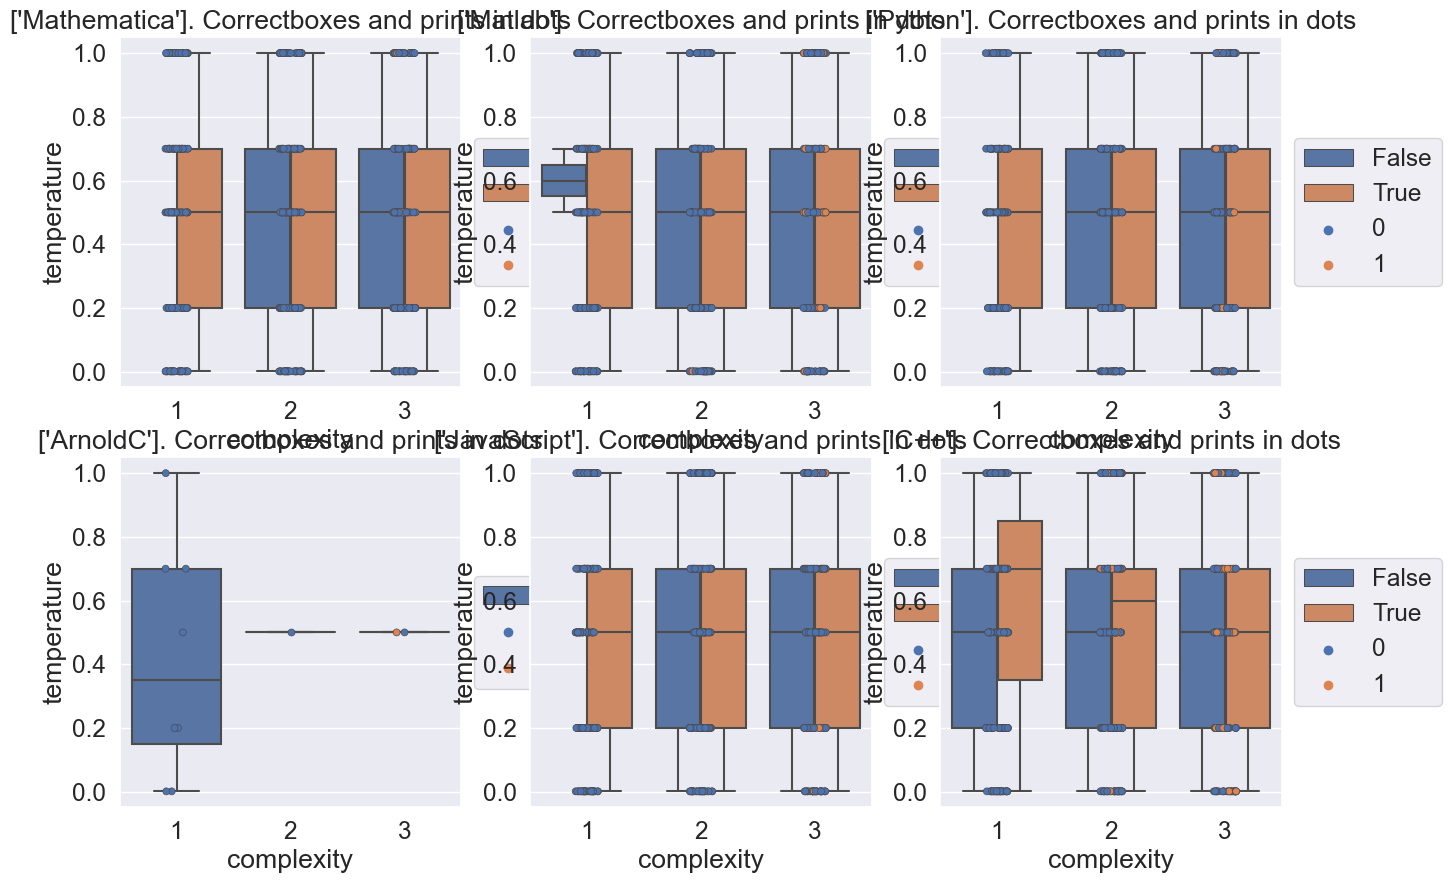

In [68]:
plot_temperature(filtered_list_dic)

In [69]:
arnold_box_df = pd.read_csv(
    "/Users/beto/Documents/Projects/medLLM/normalized_compressed_ArnoldC.csv"
)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


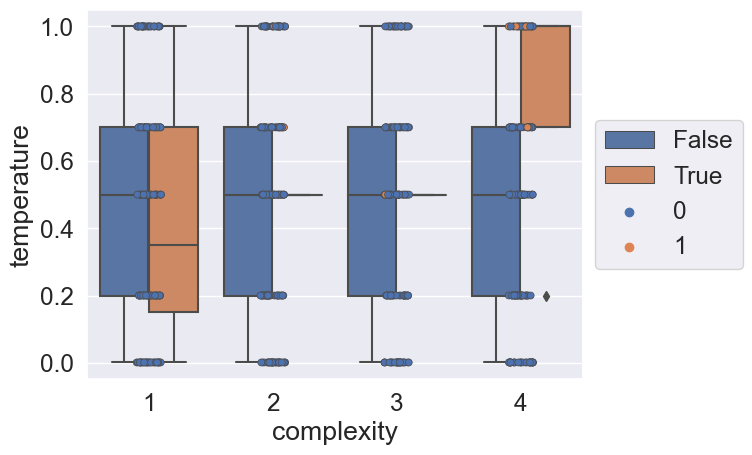

In [70]:
sns.boxplot(
    x="complexity", y="temperature", hue="correct_execution", data=arnold_box_df
)
sns.stripplot(
    x="complexity",
    y="temperature",
    hue="print_code",
    data=arnold_box_df,
    jitter=True,
    linewidth=0.5,
)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [71]:
analysis_df.columns

Index(['complexity', 'language', 'percentages', 'avg_answer_len',
       'norm_avg_answer_len', 'compressed_avg_len', 'compressed_norm_avg_len',
       'compressed_seq_avg_len', 'no_compression_percentage', 'p_percentages',
       'p_avg_answer_len', 'p_norm_avg_answer_len', 'p_compressed_avg_len',
       'p_compressed_norm_avg_len', 'p_compressed_seq_avg_len',
       'p_no_compression_percentage', 'c_percentages', 'c_avg_answer_len',
       'c_norm_avg_answer_len', 'c_compressed_avg_len',
       'c_compressed_norm_avg_len', 'c_compressed_seq_avg_len',
       'c_no_compression_percentage', 'cnp_percentages', 'cnp_avg_answer_len',
       'cnp_norm_avg_answer_len', 'cnp_compressed_avg_len',
       'cnp_compressed_norm_avg_len', 'cnp_compressed_seq_avg_len',
       'cnp_no_compression_percentage', 'ip_percentages', 'ip_avg_answer_len',
       'ip_norm_avg_answer_len', 'ip_compressed_avg_len',
       'ip_compressed_norm_avg_len', 'ip_compressed_seq_avg_len',
       'ip_no_compression_perce

In [72]:
analysis_df.to_csv("data/full_analysis_with_compression.csv", index=False)

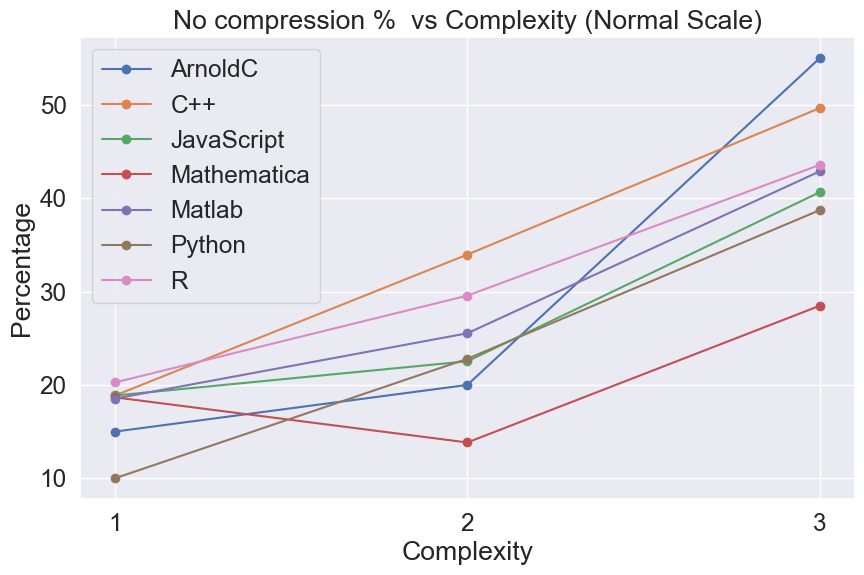

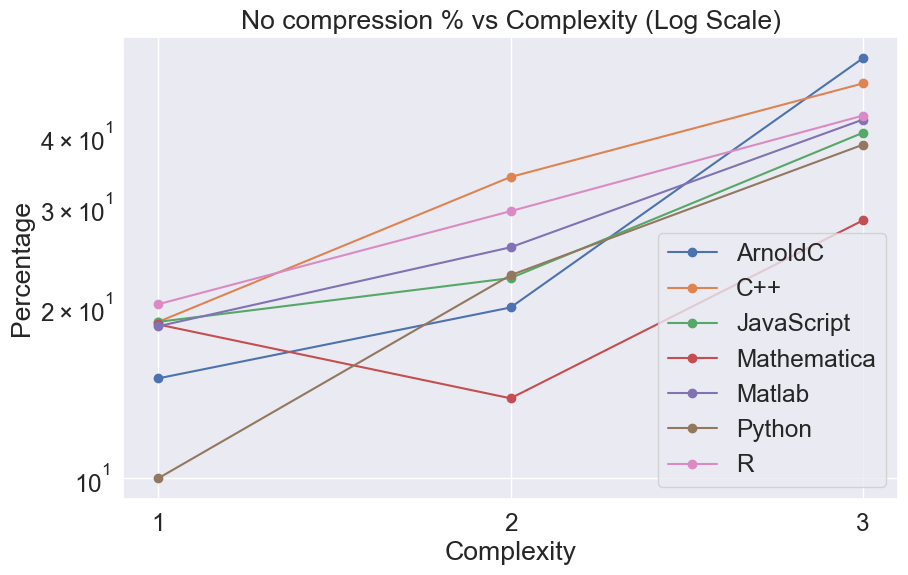

In [77]:
columns_to_plot = [
    # "percentages",
    # "avg_answer_len",
    # "norm_avg_answer_len",
    # "compressed_avg_len",
    # "compressed_norm_avg_len",
    # "compressed_seq_avg_len",
    "no_compression_percentage",
    # "p_percentages",
    # "p_avg_answer_len",
    # "p_norm_avg_answer_len",
    # "p_compressed_avg_len",
    # "p_compressed_norm_avg_len",
    # "p_compressed_seq_avg_len",
    # "p_no_compression_percentage",
    # "c_percentages",
    # "c_avg_answer_len",
    # "c_norm_avg_answer_len",
    # "c_compressed_avg_len",
    # "c_compressed_norm_avg_len",
    # "c_compressed_seq_avg_len",
    # "c_no_compression_percentage",
    # "cnp_percentages",
    # "cnp_avg_answer_len",
    # "cnp_norm_avg_answer_len",
    # "cnp_compressed_avg_len",
    # "cnp_compressed_norm_avg_len",
    # "cnp_compressed_seq_avg_len",
    # "cnp_no_compression_percentage",
    # "ip_percentages",
    # "ip_avg_answer_len",
    # "ip_norm_avg_answer_len",
    # "ip_compressed_avg_len",
    # "ip_compressed_norm_avg_len",
    # "ip_compressed_seq_avg_len",
    # "ip_no_compression_percentage",
    # "p_c_percentages",
    # "p_c_avg_answer_len",
    # "p_c_norm_avg_answer_len",
    # "p_c_compressed_avg_len",
    # "p_c_compressed_norm_avg_len",
    # "p_c_compressed_seq_avg_len",
    # "p_c_no_compression_percentage",
]

# Group the DataFrame by language
grouped_by_language = analysis_df.groupby("language")

# Plotting in normal scale
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.title(f"No compression %  vs Complexity (Normal Scale)")
    for language, group in grouped_by_language:
        group = group[group["complexity"].isin([1, 2, 3])]
        plt.plot(group["complexity"], group[column], marker='o', label=language)
    plt.xlabel("Complexity")
    plt.ylabel('Percentage')
    plt.xticks([1, 2, 3])
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting in log scale
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.title(f"No compression % vs Complexity (Log Scale)")
    for language, group in grouped_by_language:
        group = group[group["complexity"].isin([1, 2, 3])]
        plt.plot(group["complexity"], group[column], marker='o', label=language)
    plt.xlabel("Complexity")
    plt.ylabel('Percentage')
    plt.xticks([1, 2, 3])
    plt.legend()
    plt.grid(True)
    plt.yscale("log")
    plt.show()